### import required Modules

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [105]:
df_cust = pd.read_csv("olist_customers_dataset.csv")

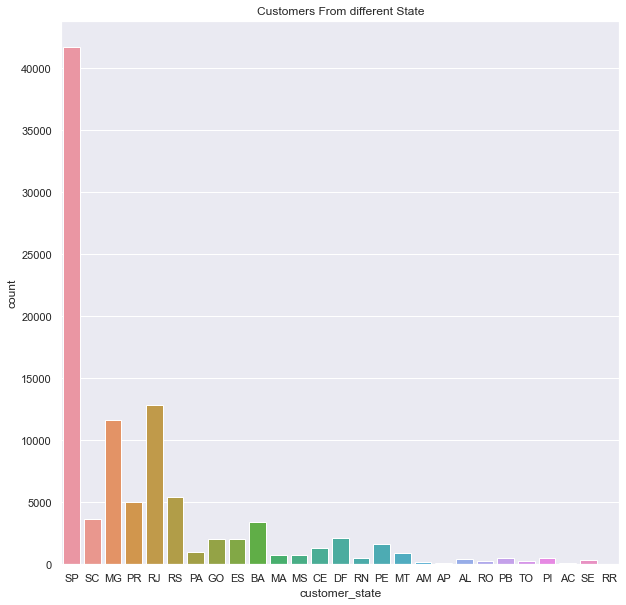

In [211]:
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.countplot("customer_state",data=df_cust)
ax.set_title('Customers From different State')
plt.show()

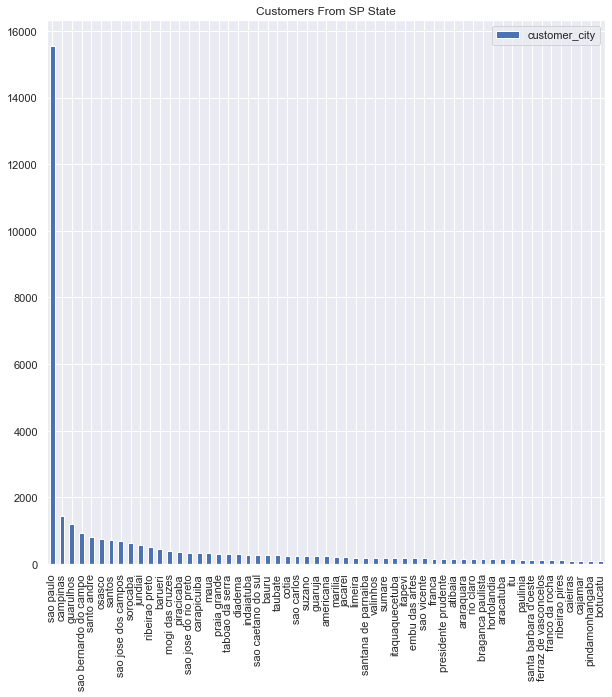

In [213]:
df = pd.DataFrame(df_cust[df_cust['customer_state'] == 'SP']['customer_city'].value_counts())
ax = df[df['customer_city'] >100].plot(kind='bar',figsize = (10,10))
ax.set_title('Customers From SP State')
plt.show()

Above Two Graphs Tell us that we have maximum customer from __Sao Paulo__ city in __SP state__

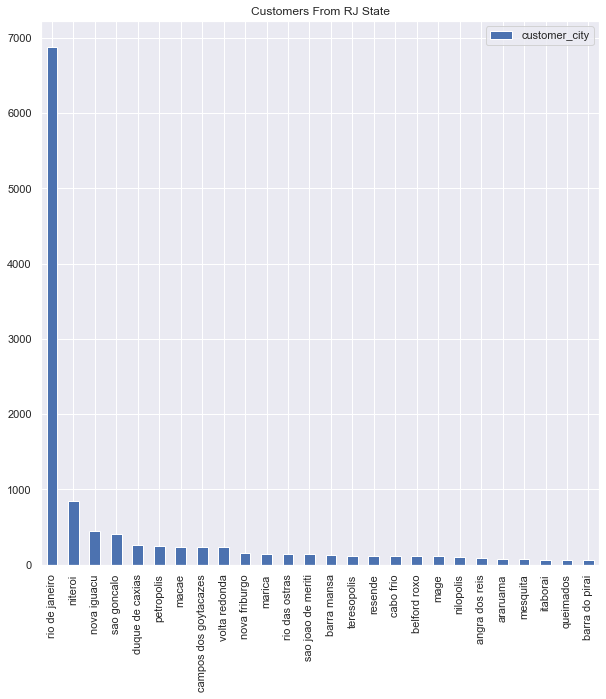

In [214]:
df = pd.DataFrame(df_cust[df_cust['customer_state'] == 'RJ']['customer_city'].value_counts())
ax = df[df['customer_city'] >50].plot(kind='bar',figsize = (10,10))
ax.set_title('Customers From RJ State')
plt.show()


## PAYMENT DATASET

In [2]:
df_orderpayment = pd.read_csv('olist_order_payments_dataset.csv')

From below plot it is clear that maximum customer use credit card for payment

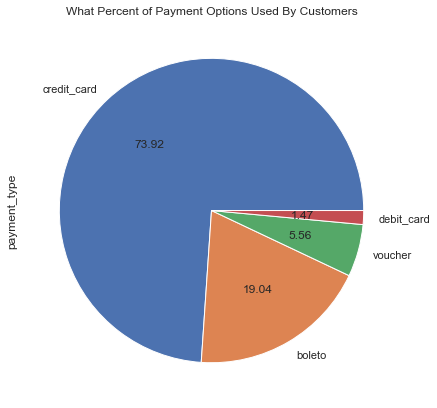

In [235]:
ax = df_orderpayment[df_orderpayment['payment_type']!='not_defined']['payment_type'].value_counts().plot(kind='pie',figsize = (7,7),autopct='%.2f')
plt.title("What Percent of Payment Options Used By Customers")
plt.show()

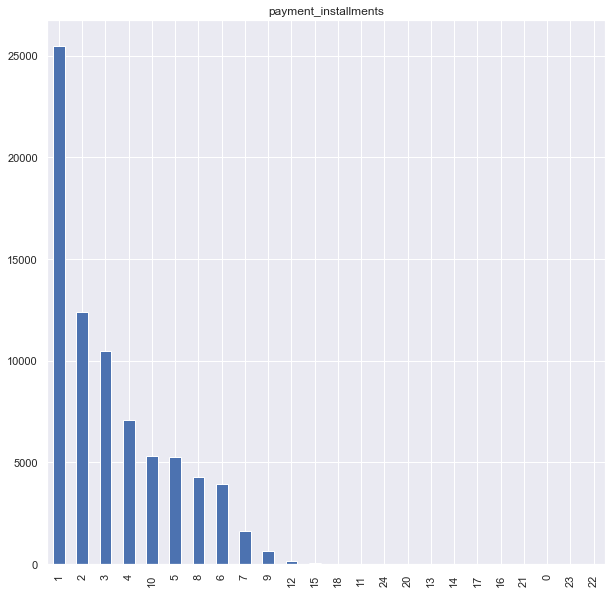

In [236]:
ax = df_orderpayment[df_orderpayment['payment_type'] == 'credit_card']['payment_installments'].value_counts().plot(kind='bar')
ax.set_title('payment_installments')
plt.show()

Below plot shows that customer wants more installement on product which is costly

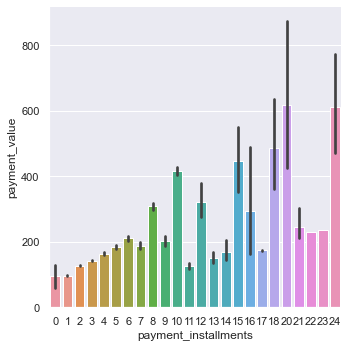

In [238]:
ax = sns.catplot('payment_installments','payment_value',kind='bar',data  = df_orderpayment[df_orderpayment['payment_type'] == 'credit_card'])
plt.show()

## product Dataset

In [242]:
df_products = pd.read_csv('olist_products_dataset.csv')

In [240]:
print("Number of Unique Products = ",len(df_products['product_category_name'].unique()))

Number of Unique Products =  74


Below wordcloud shows us which Category of products are more present <br>
the categories name have font_size bigger are present more 

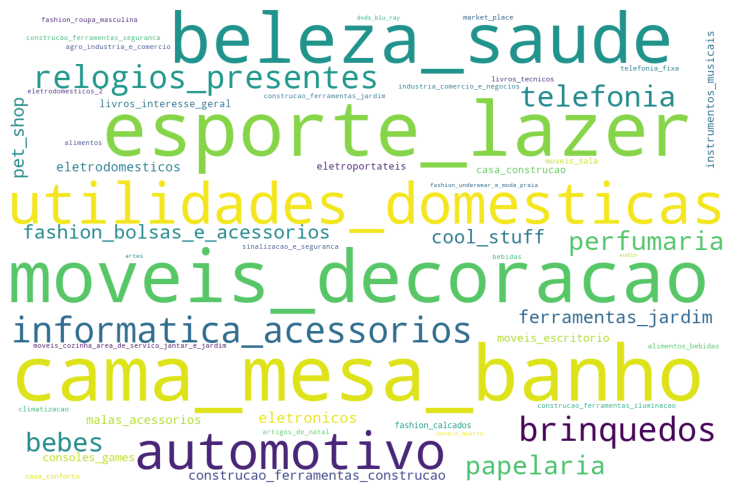

In [49]:
a = list(df_products['product_category_name'])
word = [x for x in a if str(x) != 'nan']

word = " ".join(word)
wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='white',  
                min_font_size = 10).generate(word)                         
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Reviews Dataset

In [243]:
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv')

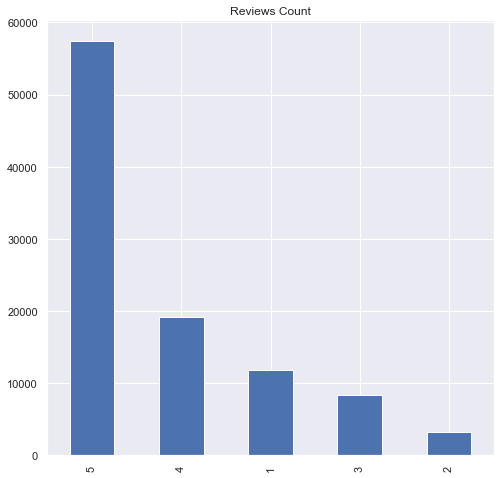

In [248]:
ax = df_reviews['review_score'].value_counts().plot(kind='bar',figsize=(8,8))
ax.set_title('Reviews Count')
plt.show()

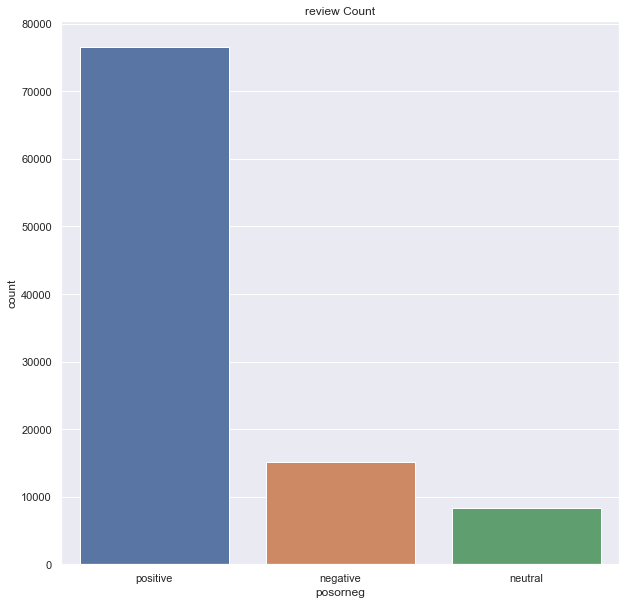

In [247]:
l = []
for i in range(len(df_reviews)):
    if df_reviews['review_score'][i] == 4 or df_reviews['review_score'][i] == 5:
        l.append('positive')
    elif df_reviews['review_score'][i] == 1 or df_reviews['review_score'][i] == 2:
        l.append('negative')
    else:
       l.append('neutral')
df_reviews['posorneg'] = l
ax = sns.countplot('posorneg',data = df_reviews)
ax.set_title('review Count')
plt.show()

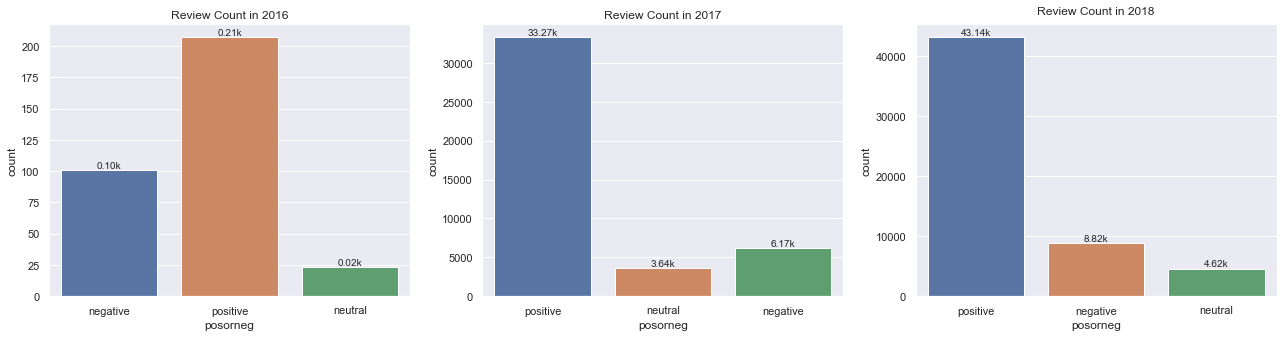

In [210]:
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])
df_reviews['review_creation_date_year'] = df_reviews['review_creation_date'].dt.to_period('Y')

fig,ax=plt.subplots(1,3,figsize=(22, 5))
p1 = sns.countplot('posorneg',data=df_reviews[df_reviews['review_creation_date_year'] == '2016'],ax=ax[0])
for p in p1.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p1.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' )



p2 = sns.countplot('posorneg',data=df_reviews[df_reviews['review_creation_date_year'] == '2017'],ax=ax[1])
for p in p2.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p2.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' )



p3 = sns.countplot('posorneg',data=df_reviews[df_reviews['review_creation_date_year'] == '2018'],ax=ax[2])
for p in p3.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p3.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' )



ax[0].set_title('Review Count in 2016')
ax[1].set_title('Review Count in 2017')
ax[2].set_title('Review Count in 2018',pad=10)


plt.show()

Below Table tells us that with time the Number of reviews increase and positive reviews also increases

In [252]:
df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])
df_reviews['review_creation_date_month'] = df_reviews['review_creation_date'].dt.to_period('M')
pd.crosstab(df_reviews['review_creation_date_month'],df_reviews['review_score'])

review_score,1,2,3,4,5
review_creation_date_month,,,,,
2016-10,26,4,14,31,106
2016-11,35,4,8,19,36
2016-12,32,0,1,1,14
2017-01,17,3,23,35,161
2017-02,101,39,122,275,887
2017-03,327,79,222,484,1393
2017-04,250,72,198,402,1145
2017-05,397,132,331,767,2109
2017-06,366,108,313,683,2007


Below Plots clearly tells us that with time positive reviews are increasing and negative ones are decresing 

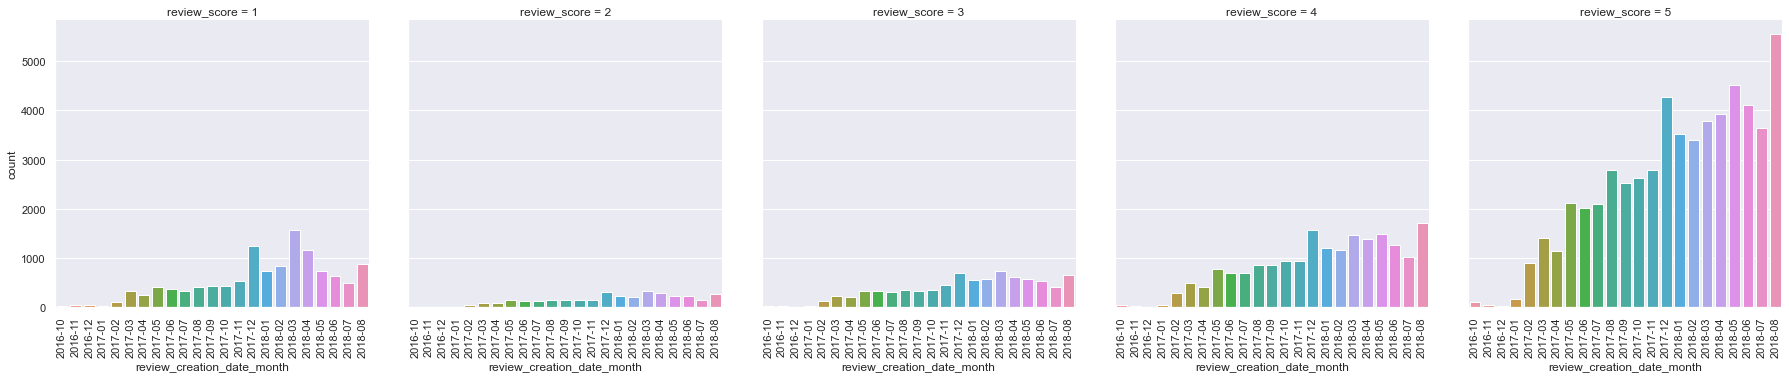

In [255]:
df_reviews = df_reviews.sort_values('review_creation_date_month')
g = sns.catplot('review_creation_date_month',kind="count",col = 'review_score',data = df_reviews)
g.set_xticklabels(rotation=90)
plt.show()

## Orders Dataset

In [138]:
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [260]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])

df_orders['order_purchase_timestamp_year'] = df_orders['order_purchase_timestamp'].dt.to_period('Y')
df_orders['order_purchase_timestamp_month'] = df_orders['order_purchase_timestamp'].dt.to_period('M')

the negative bins mean the product is late

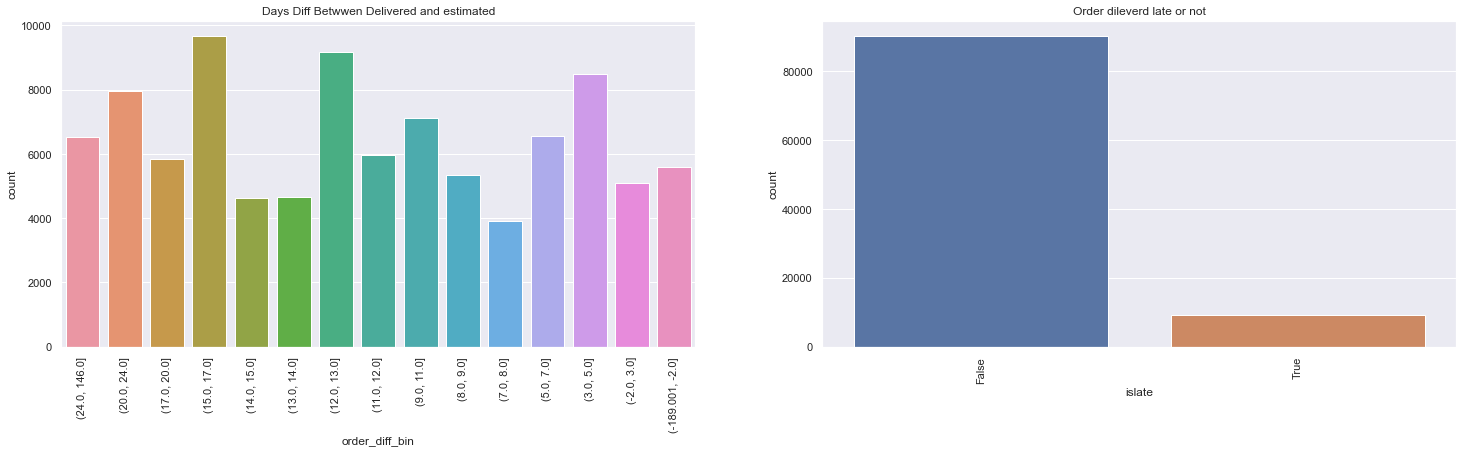

In [261]:

df_orders['order_diff'] = (df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']).dt.days
df_orders = df_orders.sort_values(by='order_diff', ascending=False)
df_orders['order_diff_bin'] = pd.qcut(df_orders['order_diff'], q=15)

fig, ax = plt.subplots(1, 2, figsize=(25, 6))
p1 = sns.countplot(x="order_diff_bin", data=df_orders,ax = ax[0])
p1.set_xticklabels(rotation=90,labels = df_orders['order_diff_bin'].unique())
p1.set_title("Days Diff Betwwen Delivered and estimated")

df_orders['islate'] = df_orders['order_diff'] <= 0
p2 = sns.countplot(x="islate", data=df_orders,ax=ax[1])
p2.set_xticklabels(rotation=90,labels = df_orders['islate'].unique())
p2.set_title("Order dileverd late or not")


plt.show()

Below plot tell us if the product is late dilevered it will affect little bit to reviews

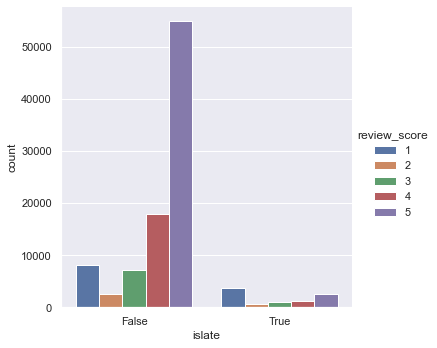

In [262]:
df = pd.merge(df_orders, df_reviews, on='order_id')
ax =sns.catplot('islate',hue="review_score",kind="count",data=df)
plt.show()

In [263]:
print(df_orders['order_status'].value_counts())

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64


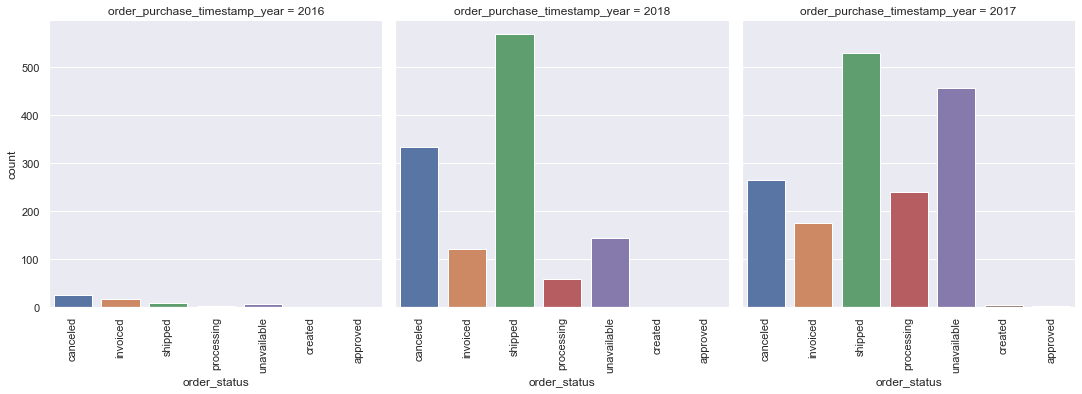

In [264]:
ax = sns.catplot('order_status',col="order_purchase_timestamp_year",kind="count",data=df_orders[df_orders['order_status'] != 'delivered'])
ax.set_xticklabels(rotation=90)

In [266]:
df = pd.merge(df_orders, df_orderpayment, on='order_id')

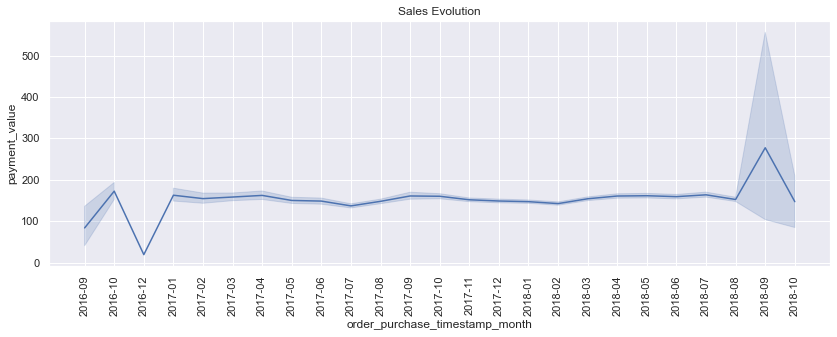

In [267]:
df['order_purchase_timestamp_month']=df['order_purchase_timestamp_month'].astype(str)
fig, ax = plt.subplots(figsize=(14, 4.5))
ax = sns.lineplot(x='order_purchase_timestamp_month', y='payment_value', data=df)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Sales Evolution')
plt.show()

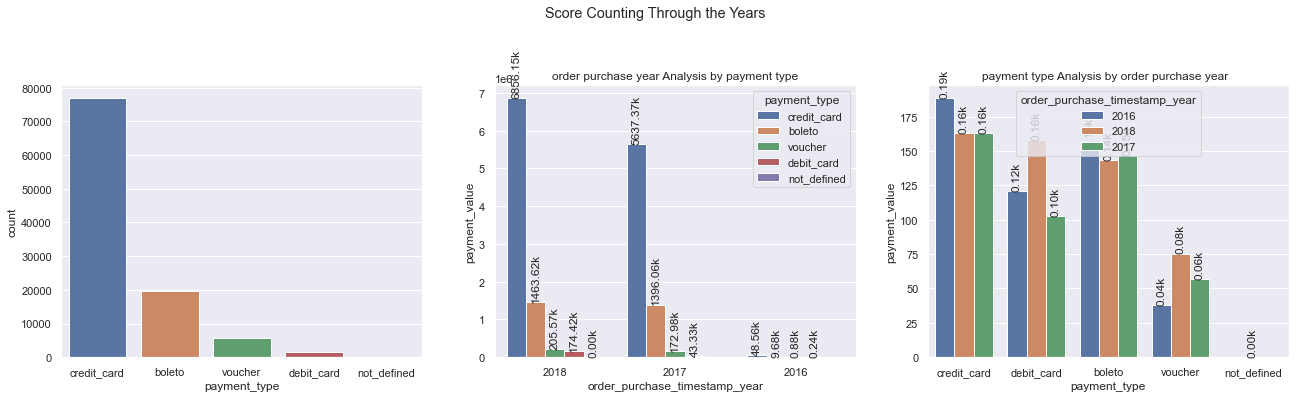

In [268]:
df_ypt = df.groupby(['order_purchase_timestamp_year', 'payment_type'], as_index=False).sum().loc[:, ['order_purchase_timestamp_year', 'payment_type', 'payment_value']]
df_dpt = df.groupby(['order_purchase_timestamp_year', 'payment_type'], as_index=False).mean().loc[:, ['order_purchase_timestamp_year', 'payment_type', 'payment_value']]


fig, axs = plt.subplots(1, 3, figsize=(22, 5))
p1 = sns.countplot('payment_type', data=df, ax=axs[0])

p2 = sns.barplot(x='order_purchase_timestamp_year', y='payment_value',ax=axs[1], hue='payment_type', data=df_ypt.sort_values(by='payment_value', ascending=False) )
for p in p2.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p2.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' ,rotation = 90)
p2.set_title('order purchase year Analysis by payment type')

p3 = sns.barplot(x='payment_type', y='payment_value', ax=axs[2], hue='order_purchase_timestamp_year', data=df_dpt.sort_values(by='payment_value', ascending=False))
for p in p3.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p3.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom',rotation = 90)
p3.set_title('payment type Analysis by order purchase year  ')

plt.suptitle('Score Counting Through the Years', y=1.1)
plt.show()


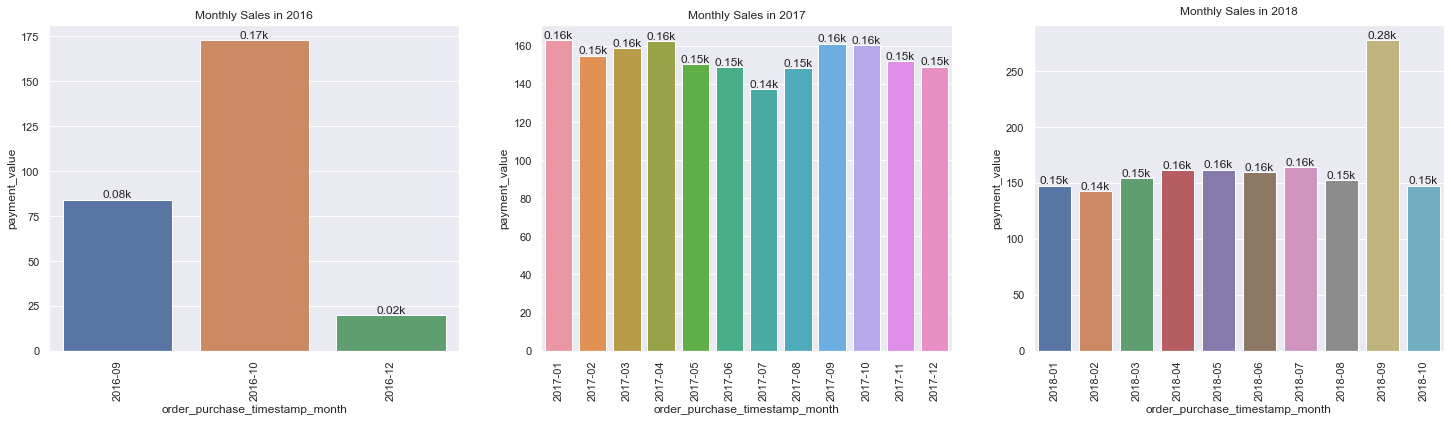

In [269]:
df_s2016 = df[df['order_purchase_timestamp_year']=='2016'].sort_values('order_purchase_timestamp_month')
df_s2017 = df[df['order_purchase_timestamp_year']=='2017'].sort_values('order_purchase_timestamp_month')
df_s2018 = df[df['order_purchase_timestamp_year']=='2018'].sort_values('order_purchase_timestamp_month')

fig, axs = plt.subplots(1, 3, figsize=(25, 6))
p1 = sns.barplot(x='order_purchase_timestamp_month', y='payment_value', data=df_s2016, ax=axs[0],ci = None)
for p in p1.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p1.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' )
p1.set_xticklabels(rotation=90,labels = df_s2016['order_purchase_timestamp_month'].unique())

p2 = sns.barplot(x='order_purchase_timestamp_month', y='payment_value', data=df_s2017, ax=axs[1],ci = None)
for p in p2.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p2.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' )
p2.set_xticklabels(rotation=90,labels = df_s2017['order_purchase_timestamp_month'].unique())

p3 = sns.barplot(x='order_purchase_timestamp_month', y='payment_value', data=df_s2018, ax=axs[2],ci = None)
for p in p3.patches:
    xp=p.get_bbox().get_points()[:,0]
    yp=p.get_bbox().get_points()[1,1]
    p3.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), ha='center', va='bottom' )
p3.set_xticklabels(rotation=90,labels = df_s2018['order_purchase_timestamp_month'].unique())


axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018',pad=10)
plt.show()